In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
52,60.0,0,3964,1,62,0,263358.03,6.80,146,0,0,43,1
183,75.0,0,99,0,38,1,224000.00,2.50,134,1,0,162,1
117,85.0,1,102,0,60,0,507000.00,3.20,138,0,0,94,0
50,68.0,1,577,0,25,1,166000.00,1.00,138,1,0,43,1
177,49.0,1,69,0,50,0,132000.00,1.00,140,0,0,147,0
161,45.0,1,130,0,35,0,174000.00,0.80,139,1,1,121,0
66,42.0,1,250,1,15,0,213000.00,1.30,136,0,0,65,1
220,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
36,90.0,1,60,1,50,0,226000.00,1.00,134,1,0,30,1
24,75.0,0,582,1,30,1,263358.03,1.83,134,0,0,23,1


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']
X.shape, y.shape

((299, 12), (299,))

In [6]:
y.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

### We can see that the target class in the data set is imbalanced and thus it would result in overfitting the 0 class.

### In order to overcome this, we would use the re-sampling technique to perform over-sampling of minority class (in this case 1).

### SMOTE: Synthetic Minority Over-sampling Technique

In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
X_smote,y_smote = SMOTE().fit_sample(X,y)
y_smote.value_counts()

1    203
0    203
Name: DEATH_EVENT, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, stratify = y_smote, test_size=0.25, random_state=69)

In [10]:
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (304, 12)
Shape of X_test: (102, 12)
Shape of y_train: (304,)
Shape of y_test: (102,)


## Logistic Regression

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression

In [12]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        51
           1       0.81      0.76      0.79        51

    accuracy                           0.79       102
   macro avg       0.80      0.79      0.79       102
weighted avg       0.80      0.79      0.79       102



<AxesSubplot:>

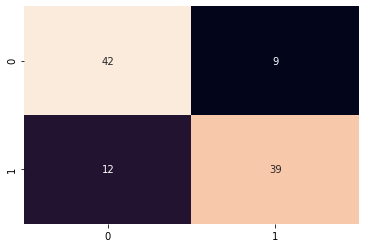

In [13]:
print(classification_report(y_test, y_pred))
      
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)

In [14]:
acclist = []
ac = accuracy_score(y_test, y_pred)
acclist.append(ac)

## Support Vector Machine (SVM)

In [15]:
from sklearn.svm import SVC

In [16]:
svc = SVC(kernel='linear')
model = svc.fit(X_train, y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.72      0.71      0.71        51
           1       0.71      0.73      0.72        51

    accuracy                           0.72       102
   macro avg       0.72      0.72      0.72       102
weighted avg       0.72      0.72      0.72       102



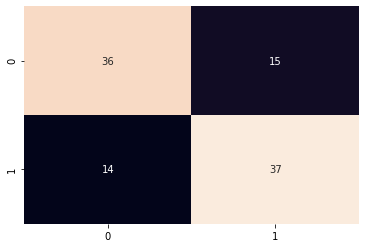

In [17]:
print(classification_report(y_test, y_pred))
      
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)

ac = accuracy_score(y_test, y_pred)
acclist.append(ac)

## Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dt = DecisionTreeClassifier()
model = dt.fit(X_train, y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        51
           1       0.86      0.86      0.86        51

    accuracy                           0.86       102
   macro avg       0.86      0.86      0.86       102
weighted avg       0.86      0.86      0.86       102



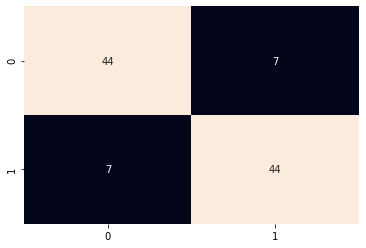

In [20]:
print(classification_report(y_test, y_pred))
      
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)

ac = accuracy_score(y_test, y_pred)
acclist.append(ac)

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier(n_estimators=55)
model = rf.fit(X_train, y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        51
           1       0.90      0.92      0.91        51

    accuracy                           0.91       102
   macro avg       0.91      0.91      0.91       102
weighted avg       0.91      0.91      0.91       102



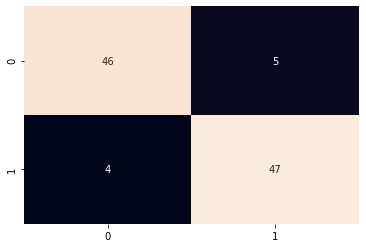

In [23]:
print(classification_report(y_test, y_pred))
      
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)

ac = accuracy_score(y_test, y_pred)
acclist.append(ac)

## Gradient Boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
gb = GradientBoostingClassifier()
model = gb.fit(X_train, y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        51
           1       0.89      0.94      0.91        51

    accuracy                           0.91       102
   macro avg       0.91      0.91      0.91       102
weighted avg       0.91      0.91      0.91       102



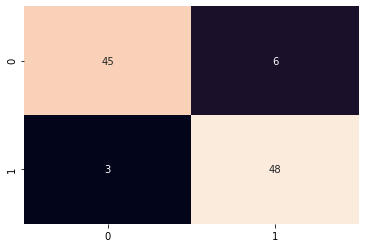

In [26]:
print(classification_report(y_test, y_pred))
      
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)

ac = accuracy_score(y_test, y_pred)
acclist.append(ac)

## k-Nearest Neighbor

In [27]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

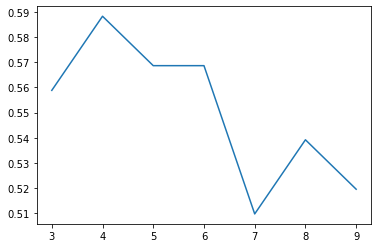

In [28]:
# Finding optimum number of neighbors

lst = []
for neighbors in range(3,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    lst.append(accuracy_score(y_test,y_pred))

plt.plot((range(3,10)), lst)
plt.show()

In [29]:
#Training the kNN on training set with 4 neighbors

classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.58      0.61      0.60        51
           1       0.59      0.57      0.58        51

    accuracy                           0.59       102
   macro avg       0.59      0.59      0.59       102
weighted avg       0.59      0.59      0.59       102



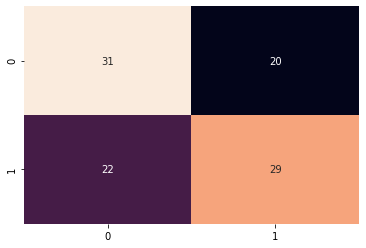

In [30]:
print(classification_report(y_test, y_pred))
      
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)

ac = accuracy_score(y_test, y_pred)
acclist.append(ac)

In [31]:
acclist

[0.7941176470588235,
 0.7156862745098039,
 0.8627450980392157,
 0.9117647058823529,
 0.9117647058823529,
 0.5882352941176471]

In [32]:
models = ['Logistic Regression','SVM','Decision Tree','Random Forest', 'Gradient Boosting', 'kNN']

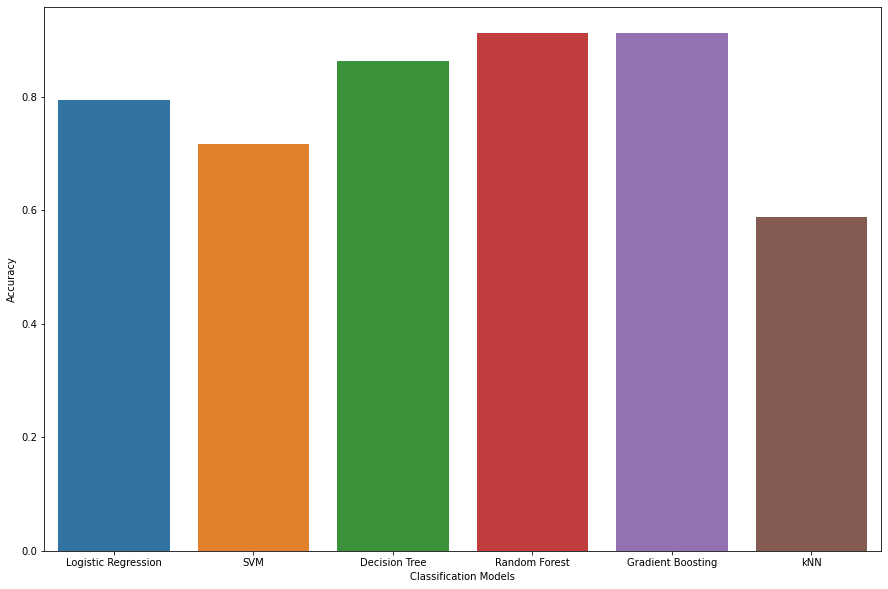

In [33]:
plt.figure(figsize=(15,10))
sns.barplot(x=models, y=acclist)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.show()